In [1]:
! pip install -U plotly kaleido


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import plotly.express as px
import os

In [158]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_file_mpl(csv_file, column_dict, color_dict):
    """
    column_dict: a mapping for column names from csv_file to more readable names for the plot. Only columns in column_dict will be displayed.
    """
    df = pd.read_csv(csv_file)
    df = df.drop(df.tail(1).index) # drop last row, it is evaluation on final model
    
    df = df.rename(column_dict, axis=1)
    model_cols = sorted(list(column_dict.values()))
    df['global_step'] = pd.Series(range(250,200250,250))
    df = df[['global_step'] + model_cols]


    xl0, xl1 = 0, 65000
    xr0, xr1 = 185000, 200000
    ratio_l = (xl1 - xl0) / (xr1 - xl0)
    ratio_r = (xr1 - xr0) / (xr1 - xl0)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, width_ratios=[ratio_l, ratio_r])
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'K'))
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000))+ 'K'))

    ax1.set_xlim(xl0, xl1)  # outliers only
    ax2.set_xlim(xr0, xr1)  # most of the data
    ax1.set_ylim(0, 8)
    ax2.set_ylim(0, 8)
    
    fig.subplots_adjust(wspace=0.05)
    for c in model_cols:
        df.plot(ax=ax1, kind='line', x='global_step', y=c, label=c, legend=None, color=color_dict[c])
        df.plot(ax=ax2, kind='line', x='global_step', y=c, label=c, legend=None, color=color_dict[c])

    lines, labels = ax1.get_legend_handles_labels()
    fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.9, 0.85))

    ax1.spines.right.set_visible(False)
    ax2.spines.left.set_visible(False)
    ax1.yaxis.tick_left()
    ax1.xaxis.set_label_text('')
    ax1.tick_params(labelright=False)  # don't put tick labels at the top
    ax2.yaxis.tick_right()
    ax2.xaxis.set_label_text('')

    
    d = 1.5
    kwargs = dict(
        marker=[(-1, -d), (1, d)],
        markersize=12,
        linestyle="none",
        color='k',
        mec='k',
        mew=1,
        clip_on=False
    )
    ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)

    fig.supxlabel('Steps')
    fig.supylabel('Evaluation Loss')
    

    
    return fig

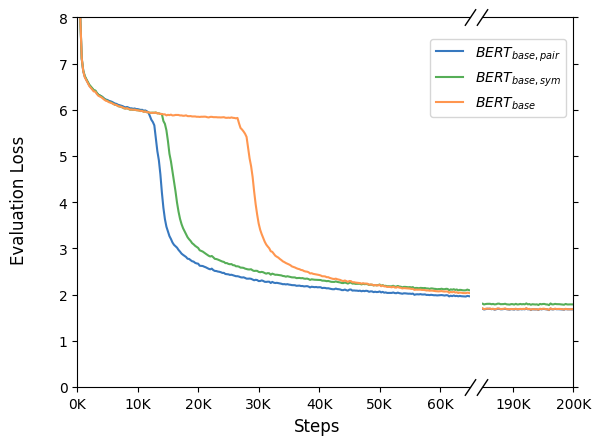

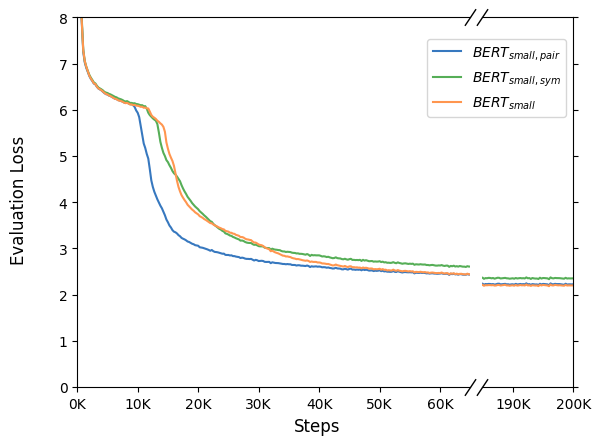

In [159]:
f_base = plot_file_mpl(
    'validation_loss_bert_base.csv',
    column_dict={
        'bert_base_symmetric_20240204-093411 - eval/loss': '$BERT_{base,sym}$', 
        'bert_base_pairwise_20240204-093411 - eval/loss': '$BERT_{base,pair}$',
        'bert_base_vanilla_20240204-093411 - eval/loss': '$BERT_{base}$'
    },
    color_dict={
        '$BERT_{base,sym}$': "xkcd:dark pastel green", 
        '$BERT_{base,pair}$': "xkcd:windows blue",
        '$BERT_{base}$': "xkcd:pastel orange",
    },
)

f_base.savefig(f"exp1_bert_base.png")
f_base.savefig(f"exp1_bert_base.pdf")


# Obtain CSV file from https://wandb.ai/mcrts-dfki/ACL2024 -> eval/loss
f_small = plot_file_mpl(
    'validation_loss_bert_small.csv',
    column_dict={
        'bert_small_symmetric_20240204-194202 - eval/loss': '$BERT_{small,sym}$', 
        'bert_small_pairwise_20240204-194202 - eval/loss': '$BERT_{small,pair}$',
        'bert_small_vanilla_20240204-194202 - eval/loss': '$BERT_{small}$'
    },
    color_dict={
        '$BERT_{small,sym}$': "xkcd:dark pastel green", 
        '$BERT_{small,pair}$': "xkcd:windows blue",
        '$BERT_{small}$': "xkcd:pastel orange",
    },
)

f_small.savefig(f"exp1_bert_small.png")
f_small.savefig(f"exp1_bert_small.pdf")

In [155]:
def plot_file(csv_file, column_dict):
    """
    column_dict: a mapping for column names from csv_file to more readable names for the plot. Only columns in column_dict will be displayed.
    """
    df = pd.read_csv(csv_file)
    df = df.drop(df.tail(1).index) # drop last row, it is evaluation on final model
    
    df = df.rename(column_dict, axis=1)
    model_cols = sorted(list(column_dict.values()))
    df['global_step'] = pd.Series(range(250,200250,250))
    df = df[['global_step'] + model_cols]
    fig = px.line(df, x='global_step', y=model_cols, width=800, height=600) # title='Validation loss', 
      
    
    fig.update_layout(
        template='plotly_white',
        xaxis_title="Steps",
        yaxis_title="Evaluation Loss",
        title_x=0.5,
        legend_title="Model",
        legend=dict(
            yanchor="top",
            title_text='',
            y=0.98,
            xanchor="right",
            x=0.99,
            bordercolor="lightgrey",
            borderwidth=1,
        ),
        #title=dict(
        #    text='Validation loss', 
        #    font=dict(size=20), #,color='black'
        #    automargin=True,
        #    yref='container',
        #    x=0.5,
        #    y=0.9,
        #    xanchor='center',
        #    yanchor='top'
        #),
        font=dict(
            size=14,
        )
    )
    
    fig.update_xaxes(
        mirror=True,
        showgrid=False,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    fig.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )
    
    fig.show()
    fig_name = os.path.splitext(csv_file)[0]
    fig.write_image(f"{fig_name}_2.png", engine="kaleido")
    fig.write_image(f"{fig_name}_2.pdf", engine="kaleido")

In [18]:
# Obtain CSV file from https://wandb.ai/mcrts-dfki/ACL2024 -> eval/loss
plot_file('validation_loss_bert_small.csv',
          column_dict={'bert_small_symmetric_20240204-194202 - eval/loss': '$BERT_{small,sym}$', 
                   'bert_small_pairwise_20240204-194202 - eval/loss': '$BERT_{small,pair}$',
                   'bert_small_vanilla_20240204-194202 - eval/loss': '$BERT_{small}$'})